# Q.2) Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np

In [3]:
#read data
glass_data=pd.read_csv('glass.csv')
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_data.shape

(214, 10)

In [7]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
#check for null values
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [71]:
#check for duplicate data
glass_data.duplicated().sum()

1

### there is 1 duplicated row in our data. let's remove it.


In [72]:
#duplicated row 
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [73]:
#dropping duplicated row
glass_data.drop_duplicates(inplace=True)

In [74]:
# types of glass
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [75]:
#counts of glass acoording to their types(our output varibale)
glass_data.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,69,69,69,69,69,69,69,69,69
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


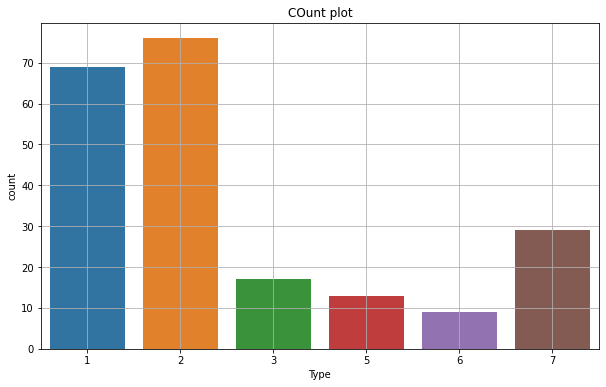

In [76]:
#count plot 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(glass_data['Type'])
plt.title('COunt plot')
plt.grid(True)
plt.show()

# Spliting the data

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=glass_data.drop('Type', axis=1)
y=glass_data[['Type']]

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [80]:
print('X_train_shape :',X_train.shape , '\ny_train_shape :',y_train.shape)
print('X_test_shape :',X_test.shape , '\ny_test_shape :',y_test.shape)

X_train_shape : (170, 9) 
y_train_shape : (170, 1)
X_test_shape : (43, 9) 
y_test_shape : (43, 1)


# Model Building Or Training

In [81]:
#import KNN libaraies
from sklearn.neighbors import KNeighborsClassifier

## Grid Search for Hyperperameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [83]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [84]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [85]:
print(grid.best_score_)
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


### Visualizing the CV results

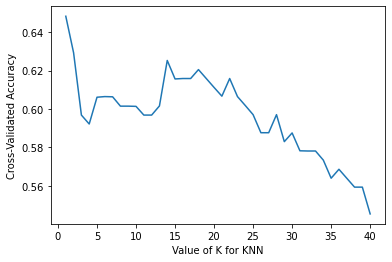

In [86]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## from above observation we find the best value for K is 1.
### now, implementing the KNN with K value 1.

In [87]:
knn = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

## Prediction on the test set 

In [88]:
y_pred = knn.predict(X_test)

In [89]:
#Print the predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [7 7 3 2 2 1 3 3 1 1 3 7 1 2 2 5 3 1 2 2 1 2 2 1 2 1 2 3 2 1 2 3 2 2 6 1 2
 2 2 5 1 1 1]


## Evaluating the Model

In [90]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [91]:
# accuracy score
accuracy_score(y_test, y_pred)

0.6976744186046512

Text(33.0, 0.5, 'True')

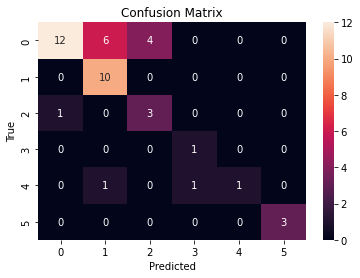

In [92]:
#Confusion matrix 
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [93]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.55      0.69        22
           2       0.59      1.00      0.74        10
           3       0.43      0.75      0.55         4
           5       0.50      1.00      0.67         1
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.70        43
   macro avg       0.74      0.77      0.69        43
weighted avg       0.80      0.70      0.69        43

